In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diff_calculator(alpha,x1,x2,x3):
  t = 0.4
  obj = objective(x1,x2,x3)   # Objective Function
  grad = -(5*x1*x2 + 21*x1*x3 - 16*x2*x3)/(10*x2 + 2*x3)  # Reduced Gradient with x1 as decision variable
  f_alpha_grad = objective(x1+alpha*0.5*(5*x1*x2+21*x1*x3-16*x2*x3)/(5*x2+x3) , x2 - alpha*(0.1250*(25*x1 + 4*x3)*(5*x1*x2 + 21*x1*x3 - 16*x2*x3))/((5*x2 + x3)**2) , x3 - alpha*(0.6250*(5*x1 - 4*x2)*(5*x1*x2 + 21*x1*x3 - 16*x2*x3))/((5*x2 + x3)**2))
  phi = objective(x1,x2,x3) - alpha*t*(0.5*(5*x1*x2+21*x1*x3-16*x2*x3))**2/((5*x2+x3)**2)
  return f_alpha_grad - phi

In [3]:
def objective(x1,x2,x3):
  return x1**2 + x2**2 + x3**2

In [4]:
def line_search(alpha,x1,x2,x3):
  count = 0
  while count<1000:
    if diff_calculator(alpha,x1,x2,x3)>0:
      alpha = alpha*0.5
      count = count+1
    else:
      break
  return alpha

In [5]:
def constraints(x1,x2,x3):
  h1 = (x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1
  h2 = x1 + x2 - x3
  return ([h1],
           [h2])

Optimal Solution  x1:-1.576567946207519 , x2:1.372866973139622 , x3:-0.2037009730678972
Objective function value:  4.41182430137535


Text(0.5, 1.0, 'Convergence Plot')

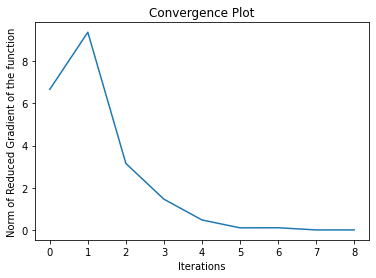

In [17]:
x1 = 0.1
x2 = 2.0217
x3 = 2.1217
tol = 0.001
epsilon = 0.001

error = []
count = 0 
while (0.5*(5*x1*x2+21*x1*x3-16*x2*x3))**2/((5*x2+x3)**2) > tol and count<100:
  err = (0.5*(5*x1*x2+21*x1*x3-16*x2*x3))**2/((5*x2+x3)**2)
  error.append(err)
  alpha = 1
  alpha = line_search(alpha,x1,x2,x3)
  x1 = x1 + alpha*0.5*(5*x1*x2+21*x1*x3-16*x2*x3)/(5*x2+x3)
  s2 = x2 - alpha*(0.1250*(25*x1 + 4*x3)*(5*x1*x2 + 21*x1*x3 - 16*x2*x3))/((5*x2 + x3)**2)
  s3 = x3 - alpha*(0.6250*(5*x1 - 4*x2)*(5*x1*x2 + 21*x1*x3 - 16*x2*x3))/((5*x2 + x3)**2)
  h = constraints(x1,s2,s3)
  while np.linalg.norm(h) > epsilon:
    s_prime_2 = s2 - h[0][0]*12.5/(5*s2+s3) - h[1][0]*s3/(5*s2+s3)
    s_prime_3 = s3 - h[0][0]*12.5/(5*s2+s3) + h[1][0]*5*s2/(5*s2+s3)
    s2 = s_prime_2
    s3 = s_prime_3
    h = constraints(x1,s2,s3)
  x2 = s_prime_2
  x3 = s_prime_3
  count = count + 1
print(f'Optimal Solution  x1:{x1} , x2:{x2} , x3:{x3}')
print("Objective function value: ", objective(x1,x2,x3))

plt.plot(list(range(count)),error)
plt.ylabel('Norm of Reduced Gradient of the function')
plt.xlabel('Iterations')
plt.title('Convergence Plot')